<center><h1>Análisis predictivo sobre la popularidad de una canción</h1></center>

# Tabla de Contenidos

1. [Introducción](#1)
    - [¿De dónde vienen los datos que se analizarán?](#1.1)
2. [Propósito](#2)
3. [EDA (Exploratory Data Analysis)](#3)
    - [Descripción de las variables de los datasets](#3.1)
    - [Archivo 2022](#3.2)
    - [Archivo 2021](#3.3)
    - [Archivo 2020](#3.4)
    - [Tonalidad (key) y su relación con la popularidad](#3.5)
4. [Machine Learning](#4)
    - [Tipos de Aprendizaje](#4.1)
    - [Modelos de Machine Learning](#4.2)
5. [Algunos datos curiosos :D](#5)
    - [Top 10 artistas populares en general 2022](#5.1)
    - [Top 10 artistas populares en TikTok 2022](#5.2)
    - [Top 10 canciones más populares en TikTok 2022](#5.3)
6. [Conclusion](#6)

<a id="1"></a>
## Introducción


<a id="1.1"></a>
### <u>¿De dónde vienen los datos que se analizarán?</u>
 Usaré datos provenientes de TikTok porque es una plataforma muy usada ultimamente y en la cual hay bastantes vídeos sobre "trends" musicales donde tienes que recrear un paso de una canción solo por mencionar un ejemplo. Estas tendencias influyen directamente en la popularidad, pues, ¿quién no escucho, "hoy me puse linda para verte"? por ser un audio que se viralizó por el baile de unos perritos. 
 Sin embargo, por motivos del entrenamiento de los modelos empleados también se utilizarán fuentes de datos provenientes de Spotify.


<a id="2"></a>
## Propósito
En este análisis se pretende predecir que canción será popular de acuerdo con datos sobre canciones que fueron famosas y dependiendo de los resultados del análisis que se obtengan, se podrá dar una respuesta sobre si cierta canción será bien recibida por el público o no.

<a id="3"></a>
## EDA (Exploratory Data Analysis)
Haré un EDA para poder resumir los datos y encontrar información valiosa que nos ayude con el propósito del proyecto.

<a id="3.1"></a>
### <u>Descripción de las variables de los datasets</u>

- track_name: Nombre de la canción.

- artist_name: Nombre del artista.

- artist_pop: Popularidad del artista.

- album: Album de la canción.

- track_pop: Popularidad de la canción.

- danceability: Que tan "bailable" en una canción. Un valor de 0 es el menos bailable y 1 el más bailable.

- energy: Representa la intensidad de una canción, por ejemplo, una canción de rock tendrá el valor de 0.8 mientras que una balada 0.2. Valores desde 0 a 1.

- loudness: Medida del sonido en dB.

- mode: Escala de la canción, menor es representado por 0 y mayor por 1.

- key: Es el tono de la canción.  0 = C, 1 = C♯/D♭, 2 = D, y así sucesivamente. Si no se detecta un tono el valor es -1.

- speechiness: Presencia de voz en la canción, entre más cerca esté de 1 significa que la canción tiene muchas palabras habladas y si se acerca más a 0, significa que puede ser una canción de puro instrumental.

- acousticness: Si el valor es 1, la canción es acústica. Valores desde 0 a 1.

- instrumentalness: Entre más cerca este de 1, se garantiza que la canción es instrumental y por lo tanto no habrá canto en ella. Valores desde 0 a 1.

- liveness: Nos indica si una canción fue grabada mientras estaba siendo interpretada en vivo, en un concierto por ejemplo, esto para los valores más altos, cerca de 1, va de 0 a 1.

- valence: Las pistas con un valor alto suenan más positivas es decir, felices o alegres, mientras que las pistas con un valor bajo suenan tristes, deprimidas o enojadas, los valores en este caso también van de 0 a 1.

- tempo: Indica la velocidad a la que se deben interpretar las notas y se mide en unidades de beats por minuto (BPM).

- time_signature: Estima la firma de tiempo de una canción, que especifica la cantidad de pulsos en cada compás y el tipo de nota que representa un pulso, puede tener valores que van desde 3 hasta 7, lo que indica firmas de tiempo de "3/4" hasta "7/4" respectivamente. La firma de tiempo se representa como una fracción colocada al inicio de una partitura musical. El numerador de la fracción indica la cantidad de pulsos o tiempos que hay en un compás, y el denominador especifica el tipo de nota que representa un pulso. La firma de tiempo de 4/4 es la más común.

- duration_ms: Duración de la canción en milisegundos.

In [1]:
# Importación de las librerías necesarias para la ejecución del notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id="3.2"></a>
### <u>Archivo 2022</u>

In [2]:
# Se lee el primer conjunto de datos llamado TikTok_songs_2022.csv y se ordena la información en un DataFrame a través de describe()
df22 = pd.read_csv('data/TikTok_songs_2022.csv')
df22.describe()


,artist_pop,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,64.186312,59.844106,0.715338,0.682631,-6.300513,0.536122,5.809886,0.117268,0.193188,0.020244,0.202562,0.506149,122.883696,3.969582,174656.212928
std,18.146338,24.976524,0.117722,0.141756,1.905114,0.499644,3.657312,0.101417,0.214588,0.109370,0.151808,0.220757,24.396686,0.288168,34785.125564
min,18.000000,0.000000,0.308000,0.214000,-13.468000,0.000000,0.000000,0.025200,0.000038,0.000000,0.026500,0.036300,62.948000,1.000000,85742.000000
25%,50.000000,47.000000,0.646000,0.593000,-7.423500,0.000000,2.000000,0.044750,0.028100,0.000000,0.094350,0.349000,106.850500,4.000000,148646.000000
50%,64.000000,66.000000,0.726000,0.701000,-6.067000,1.000000,6.000000,0.070700,0.120000,0.000003,0.132000,0.485000,123.056000,4.000000,171028.000000
75%,81.000000,79.500000,0.796500,0.790500,-4.887000,1.000000,9.000000,0.156000,0.298500,0.000334,0.277500,0.680000,130.004500,4.000000,199047.000000
max,95.000000,97.000000,0.961000,0.955000,-2.634000,1.000000,11.000000,0.481000,0.965000,0.939000,0.790000,0.956000,187.906000,5.000000,298933.000000



Con la función describe() obtenemos un panorama general de los datos y estadísticas muy útiles, por ejemplo, podemos ver que la media (mean) de time_signature es casi 4, lo que confirma que la firma de tiempo más común es la de 4/4. Por otra parte podemos observar que la mayoría de canciones presentan bajos valores en acousticness por lo que se infiere que las canciones populares tienden a no ser acústicas.

In [ ]:
df22

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,Running Up That Hill (A Deal With God),Kate Bush,81,Hounds Of Love,95,0.629,0.547,-13.123,0,10,0.0550,0.720000,0.003140,0.0604,0.197,108.375,4,298933
1,As It Was,Harry Styles,91,As It Was,96,0.520,0.731,-5.338,0,6,0.0557,0.342000,0.001010,0.3110,0.662,173.930,4,167303
2,Sunroof,Nicky Youre,73,Sunroof,44,0.768,0.716,-5.110,1,10,0.0404,0.350000,0.000000,0.1500,0.841,131.430,4,163026
3,Heat Waves,Glass Animals,80,Dreamland (+ Bonus Levels),89,0.761,0.525,-6.900,1,11,0.0944,0.440000,0.000007,0.0921,0.531,80.870,4,238805
4,About Damn Time,Lizzo,81,About Damn Time,92,0.836,0.743,-6.305,0,10,0.0656,0.099500,0.000000,0.3350,0.722,108.966,4,191822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,The Less I Know The Better,Tame Impala,78,Currents,84,0.640,0.740,-4.083,1,4,0.0284,0.011500,0.006780,0.1670,0.785,116.879,4,216320
259,Dandelions,Ruth B.,75,Safe Haven,90,0.609,0.692,-2.958,1,1,0.0259,0.015700,0.000000,0.0864,0.454,116.959,3,233720
260,Jimmy Cooks (feat. 21 Savage),Drake,95,"Honestly, Nevermind",92,0.529,0.673,-4.711,1,0,0.1750,0.000307,0.000002,0.0930,0.366,165.921,4,218365
261,Good Looking,Suki Waterhouse,64,Good Looking,80,0.377,0.558,-9.076,1,4,0.0299,0.078900,0.000342,0.1250,0.267,149.971,3,214800


In [3]:
# Función que nos ayudará a crear los mapas de correlación
def correlacion_mapa(df, ax, palette):
    correlacion = df.corr()
    sns.heatmap(correlacion, annot=True, ax=ax,cmap=palette, square=True, linewidth=.5, vmin=-1, vmax=1, fmt=".2f")

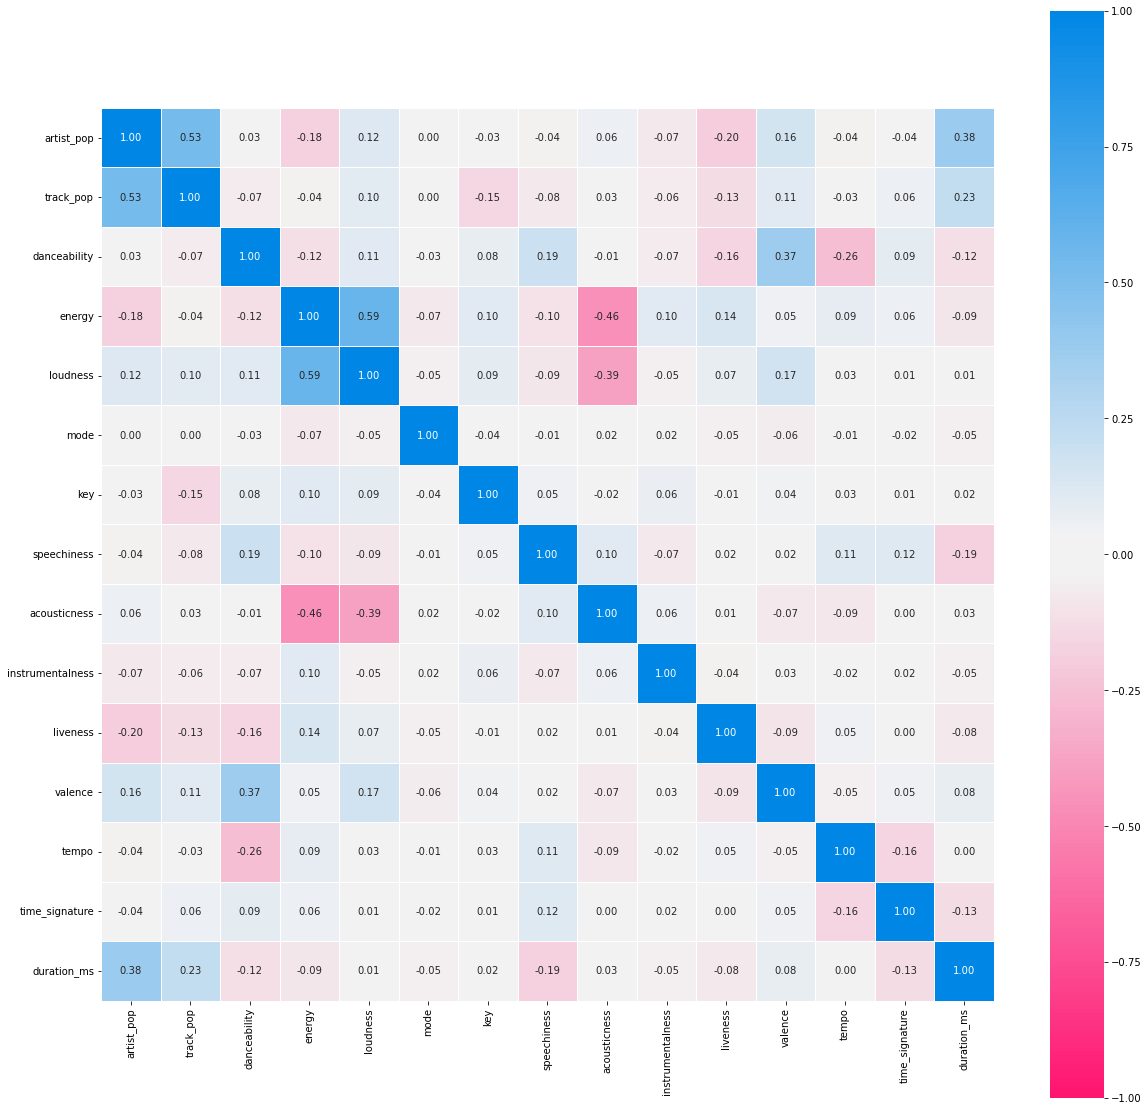

In [4]:
# Creación del mapa de correlación
fig, ax = plt.subplots(figsize=(20, 20))
palette = sns.diverging_palette(0, 250, s=100, l=55, as_cmap=True, sep=10)
correlacion_mapa(df22, ax, palette)


En el archivo de 2022 las relaciones más destacables que se observan son: 
- Podemos ver que hay correlacion alta entre valence y danceability por lo que se deduce que entre más bailable sea una canción, más feliz es una canción.
- Por otra parte, hay correlación negativa entre energy y acousticness, entonces podemos decir que entre más energía tenga la canción, menos acústica será.

<a id="3.3"></a>
### <u>Archivo 2021</u>
Repetí el mismo breve análisis para otros conjuntos de datos de los años 2021 y 2020.

In [5]:
# Se lee el segundo conjunto de datos llamado TikTok_songs_2021.csv y se ordena la información en un DataFrame a través de describe()
df21 = pd.read_csv('data/TikTok_songs_2021.csv')
df21.describe()

,artist_pop,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,70.878947,65.578947,0.708105,0.672700,-5.929774,0.621053,4.894737,0.093522,0.204124,0.007814,0.176361,0.563204,125.533495,3.957895,194612.563158
std,15.301246,22.917417,0.116882,0.149721,2.305945,0.486407,3.661537,0.092847,0.222932,0.052535,0.129755,0.213829,26.832668,0.322549,38899.194512
min,0.000000,0.000000,0.386000,0.184000,-17.667000,0.000000,0.000000,0.025900,0.000079,0.000000,0.026500,0.034800,65.043000,1.000000,80118.000000
25%,63.000000,63.000000,0.651000,0.578250,-7.040750,0.000000,1.000000,0.041825,0.020350,0.000000,0.093225,0.412750,107.978000,4.000000,169067.000000
50%,73.500000,73.000000,0.710000,0.692000,-5.703000,1.000000,5.000000,0.055700,0.119000,0.000000,0.118000,0.584000,122.975000,4.000000,195806.500000
75%,82.000000,79.000000,0.784250,0.790000,-4.322750,1.000000,8.000000,0.096925,0.320250,0.000036,0.240000,0.750750,138.041750,4.000000,218103.500000
max,95.000000,91.000000,0.949000,0.989000,-1.609000,1.000000,11.000000,0.505000,0.837000,0.611000,0.825000,0.970000,206.072000,5.000000,344571.000000


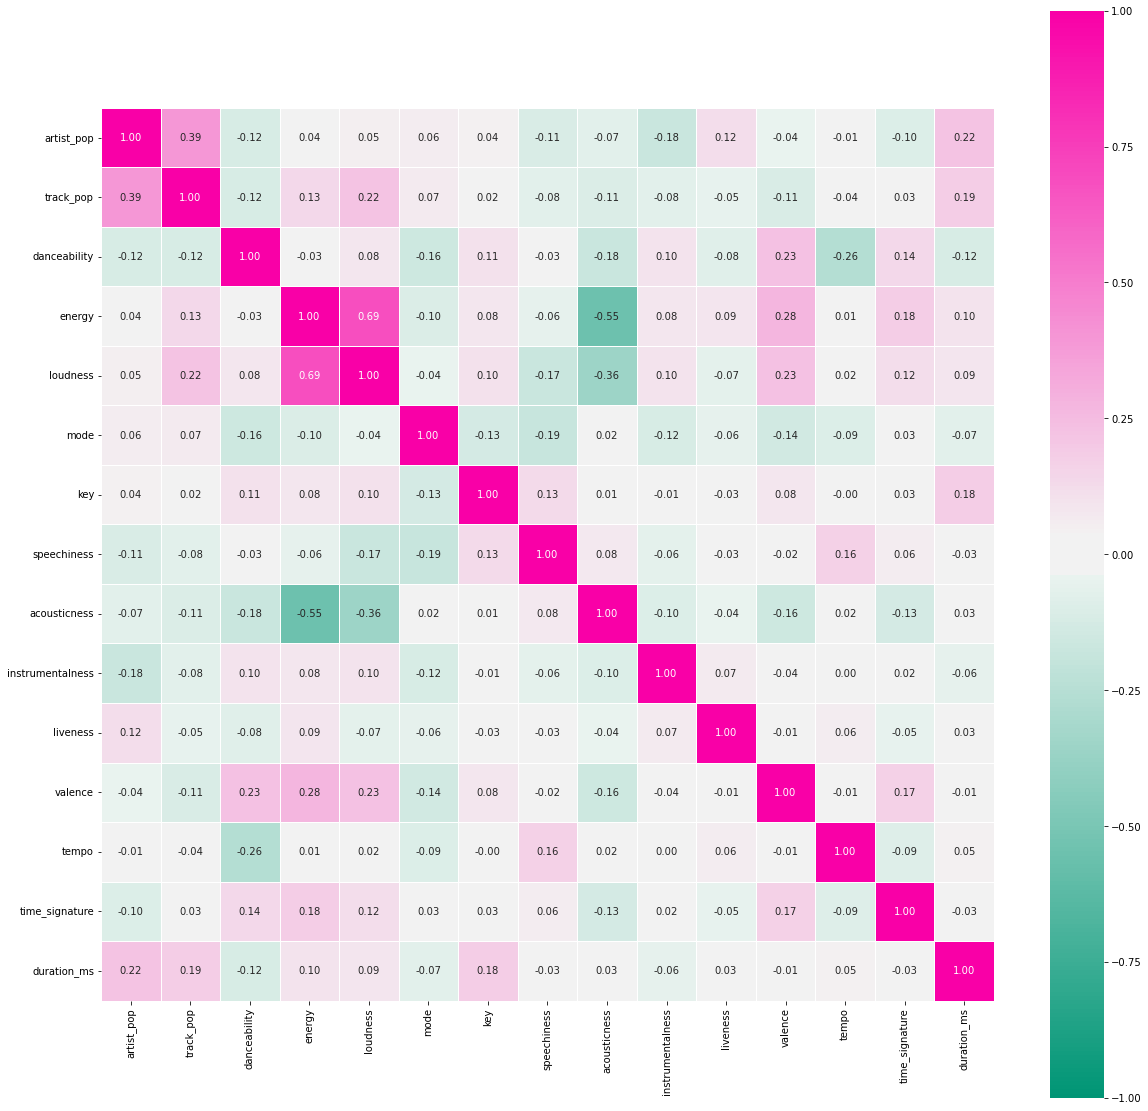

In [ ]:
# Creación del mapa de correlación
fig, ax = plt.subplots(figsize=(20, 20))
palette = sns.diverging_palette(160, 340, s=100, l=55, as_cmap=True, sep=10)
correlacion_mapa(df21, ax, palette)

En el archivo de 2021 las relaciones más destacables que se observan son: 
- Loudness con energy, probablemente entre más nivel de "ruido" haya en una canción más enérgica es, como se habia mencionado, una canción con alta energía sería algo como una canción de Rock.
-  Por otro lado, acousticness presenta una correlación negativa con energy y esto indica que entre más acústica sea una canción, menos enérgica será. Esta correlación también se presentó en el dataset anterior.
- Una relación curiosa es la de acousticness y loudness pues entre más acústica sea una canción menos valor de loudness tendrá y esta tercera relación se puede ver por separado en las primeras dos relaciones solo que cada una se relaciona con energy.

<a id="3.4"></a>
### <u>Archivo 2020</u>

In [6]:
# Se lee el tercer conjunto de datos llamado TikTok_songs_2020.csv y se ordena la información en un DataFrame a través de describe()
df20 = pd.read_csv('data/TikTok_songs_2020.csv')
df20.describe()

,artist_pop,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
count,292.000000,292.00000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,67.318493,61.19863,0.725404,0.612855,-6.884469,0.534247,5.041096,0.150245,0.232500,0.028654,0.187648,0.545168,119.770538,3.945205,192805.212329
std,16.571140,20.78498,0.143129,0.163366,2.697198,0.499682,3.689638,0.150504,0.255970,0.114149,0.141949,0.212719,25.609372,0.316354,55763.157757
min,0.000000,0.00000,0.174000,0.045800,-23.928000,0.000000,0.000000,0.025900,0.000041,0.000000,0.021900,0.038900,71.994000,1.000000,37632.000000
25%,57.750000,57.00000,0.651000,0.489250,-8.369750,0.000000,1.000000,0.045200,0.027050,0.000000,0.095175,0.389750,100.064000,4.000000,158673.000000
50%,69.000000,66.00000,0.734500,0.631000,-6.523000,1.000000,5.000000,0.084650,0.129000,0.000000,0.124000,0.554500,119.967000,4.000000,191130.000000
75%,80.000000,74.00000,0.831750,0.729000,-4.983500,1.000000,8.000000,0.217000,0.329250,0.000196,0.251000,0.712750,131.334750,4.000000,221394.750000
max,95.000000,90.00000,0.980000,0.955000,-2.607000,1.000000,11.000000,0.907000,0.974000,0.856000,0.944000,0.967000,210.857000,5.000000,467587.000000


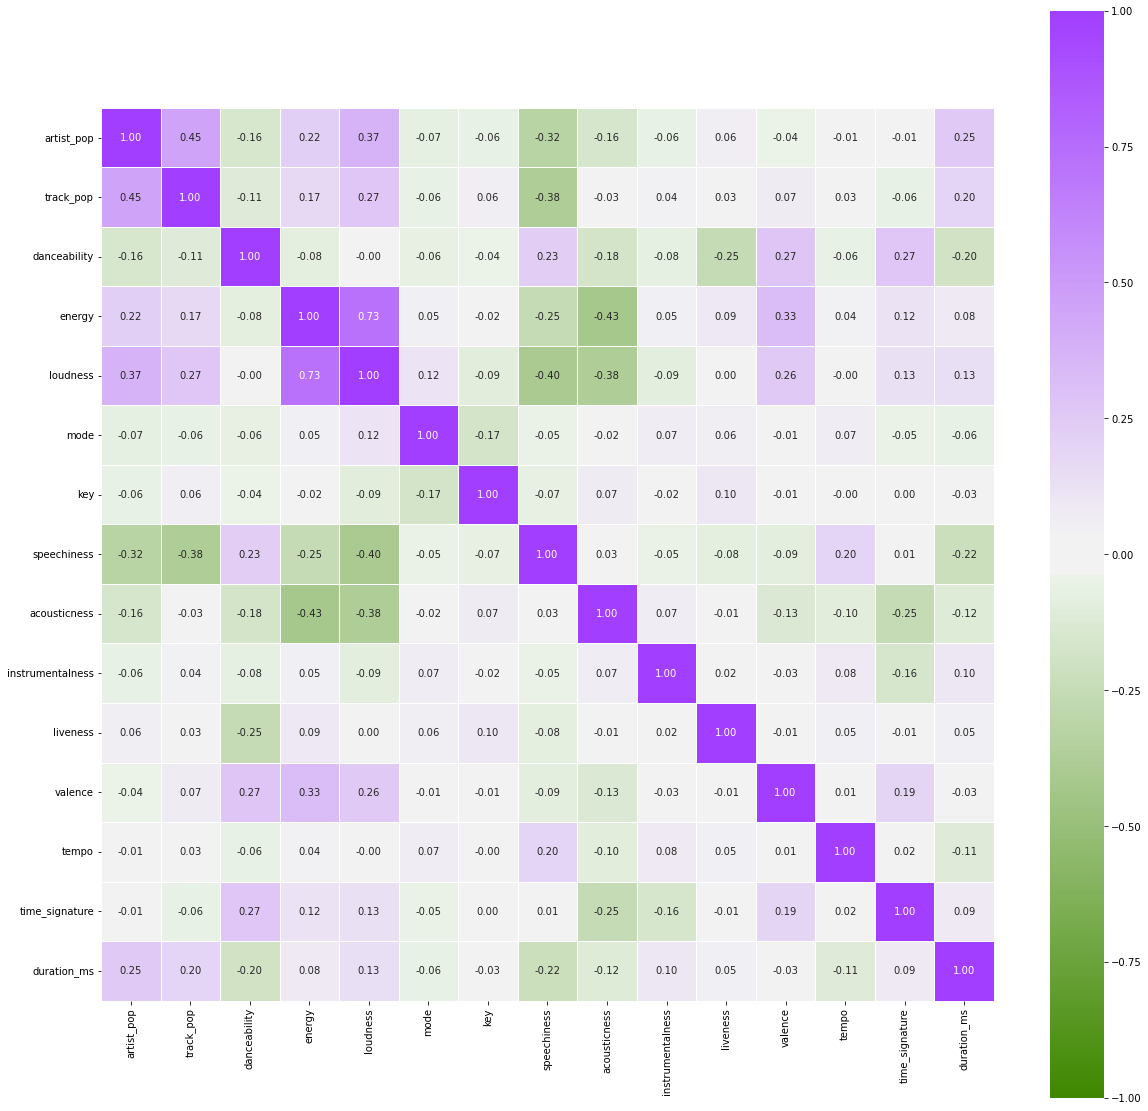

In [ ]:
# Creación del mapa de correlación
fig, ax = plt.subplots(figsize=(20, 20))
palette = sns.diverging_palette(120, 280, s=100, l=50, as_cmap=True, sep=10)
correlacion_mapa(df20, ax, palette)

En el archivo de 2020 las relaciones más destacables que se observan son: 
- Valence con energy tiene conrrelación positiva por lo que se podría indicar que entre más valor de valence tenga la canción tendra más valor en energy y por lo tanto la canción será más alegre y enérgica.
- De nuevo, acousticness presenta una correlación negativa con energy y loudness con energy de nuevo presentan correlación positiva.
- En esta ocasión loudness se relaciona con artist_pop positivamente, quiza un artista popular en este año tendía a tener canciones con valores altos de loudness y por lo tanto con más energía.
- Parece que entre mayor sea el valor de speechiness menor será el valor de loudness.

<a id="3.5"></a>
### <u>Tonalidad (key) y su relación con la popularidad</u>
Ahora revisaré si tiene algo que ver la tonalidad usada en las canciones con su popularidad.

In [ ]:
# Función para crear gráfico de barras con los valores de key más utilizados en la música
def plot_key_distribution(df):
    # Convertir la columna 'key' a tipo string
    df['key'] = df['key'].astype(str)

    # pasamos los valores de la columna 'key' a su equivalente en notación musical
    key_mapping = {
        "0": "C",
        "1": "C♯,D♭",
        "2": "D",
        "3": "D♯,E♭",
        "4": "E",
        "5": "F",
        "6": "F♯,G♭",
        "7": "G",
        "8": "G♯,A♭",
        "9": "A",
        "10": "A♯,B♭",
        "11": "B"
    }
    df['key'] = df['key'].map(key_mapping)

    # Agrupar por 'key' y contar el número de apariciones
    song_keys = df.groupby('key').size().reset_index(name='n_key')

    # Ordenar los valores en orden descendente
    song_keys = song_keys.sort_values('n_key', ascending=False)

    # Convertir 'key' en un factor y establecer el orden descendente
    song_keys['key'] = pd.Categorical(song_keys['key'], song_keys['key'][::-1])

    # Crear el gráfico de barras
    plt.figure(figsize=(10, 6))
    plt.bar(song_keys['key'], song_keys['n_key'], color='orchid')
    plt.title('Distribution of the Keys of Top Songs')
    plt.xlabel('Keys')
    plt.ylabel('Count of Keys on the Top 100')
    plt.xticks(rotation=45)
    plt.show()


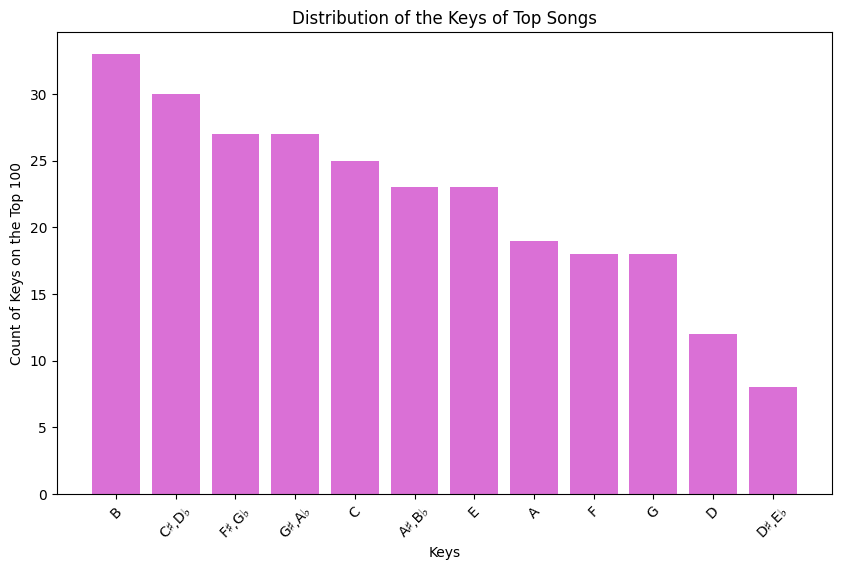

In [ ]:
songs_key2022=plot_key_distribution(df22)
songs_key2022

En esta gráfica podemos apreciar cual tonalidad es la más usada en las canciones, en el caso del archivo 2022 fue B, mientras que la menos usada fue D♯,E♭. También se utilizó mucho la C♯,D♭.

Veamos ahora cuales son las canciones que usaron la tonalidad B y que además fueron populares:

In [ ]:
# Función para encontrar las canciones más populares que usen cierta nota más usada en su año
def popular_songs_key(df, key):
    # Filtrar y ordenar las canciones por tonalidad y popularidad de forma descendente
    songs_key = df[df['key'] == key].sort_values('track_pop', ascending=False).head(40)

    # Imprimir las canciones más populares en la tonalidad especificada junto con su energy, valence y danceability
    print("Valores de Energy, Valence y Danceability de las canciones en tonalidad", key)
    for index, row in songs_key.iterrows():
        print("Canción:", row['track_name'])
        print("Artista:", row['artist_name'])
        print("Energy:", row['energy'])
        print("Valence:", row['valence'])
        print("Danceability:", row['danceability'])
        print("--------------------")

    # Obtener el número de canciones en la tonalidad especificada
    num_songs = len(songs_key)
    # Imprimir el resultado
    print("Número de canciones en tonalidad", key, ":", num_songs)
    
    # Calcular los promedios de energy, valence y danceability
    energy_mean = np.mean(songs_key['energy'])
    valence_mean = np.mean(songs_key['valence'])
    danceability_mean = np.mean(songs_key['danceability'])
    # Imprimir los promedios
    print("Valores promedio:")
    print("Energy:", energy_mean)
    print("Valence:", valence_mean)
    print("Danceability:", danceability_mean)

In [ ]:
popular_songs_key(df22, 'B')

Valores de Energy, Valence y Danceability de las canciones en tonalidad B
Número de canciones en tonalidad B : 0
Valores promedio:
Energy: nan
Valence: nan
Danceability: nan


Como podemos ver, el promedio de la energía es mayor de 0.7, por lo que una canción puede ser que sea popular si usa la tonalidad B, tiene un nivel de energía alto, si su valence igual tiene valores por arriba de 0.5 lo que significa que sea una canción alegre y por último que tenga un buen ritmo como para bailarla, quiza esto tenga que ver con los trends de TikTok que fueron mencionados, pues las canciones populares analizadas tienen promedio de 0.72, casi 0.73 en danceability.

Sin embargo, como fue mencionado, también se vió la presencia de C♯,D♭, así que ahora analizaré esa tonalidad.

In [ ]:
popular_songs_key(df22, 'C♯,D♭')

Valores de Energy, Valence y Danceability de las canciones en tonalidad C♯,D♭
Número de canciones en tonalidad C♯,D♭ : 0
Valores promedio:
Energy: nan
Valence: nan
Danceability: nan


De nuevo pasaron por arriba de 0.6 los promedios de Energy y Danceability, sin embargo valence bajó por lo que se puede decir que el uso de la escala C♯,D♭ indica que una canción será menos alegre pero igual se mantiene un poco la energía y danceability de una canción con tonalidad B.

Ahora lo haré con los archivos 2021 y 2020:

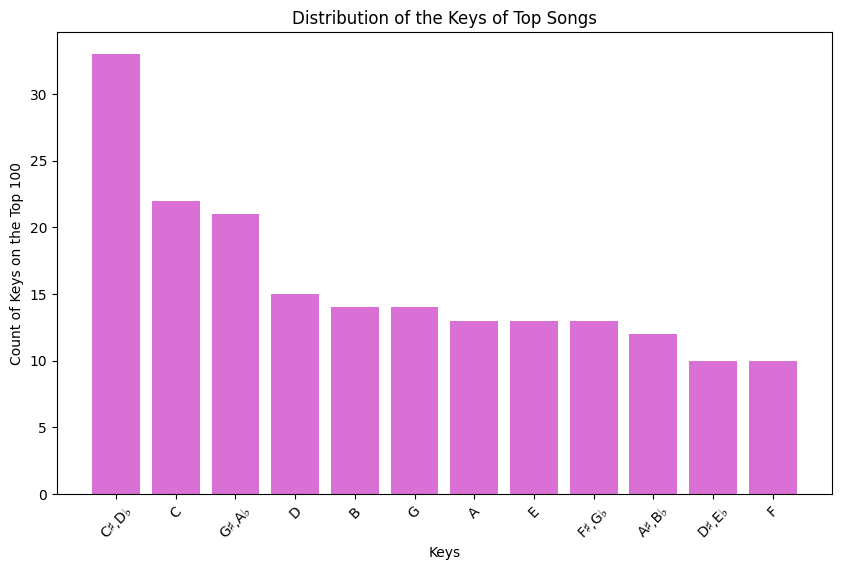

In [ ]:
songs_key2021=plot_key_distribution(df21)
songs_key2021

En el archivo de 2021 la tonalidad más usada fue C#, D♭ y la menos usada F.

In [ ]:
popular_songs_key(df21, 'C♯,D♭')

Valores de Energy, Valence y Danceability de las canciones en tonalidad C♯,D♭
Canción: Dandelions
Artista: Ruth B.
Energy: 0.692
Valence: 0.454
Danceability: 0.609
--------------------
Canción: STAY (with Justin Bieber)
Artista: The Kid LAROI
Energy: 0.764
Valence: 0.478
Danceability: 0.591
--------------------
Canción: THATS WHAT I WANT
Artista: Lil Nas X
Energy: 0.846
Valence: 0.546
Danceability: 0.737
--------------------
Canción: Need to Know
Artista: Doja Cat
Energy: 0.609
Valence: 0.194
Danceability: 0.664
--------------------
Canción: Good Days
Artista: SZA
Energy: 0.655
Valence: 0.412
Danceability: 0.436
--------------------
Canción: Sweet but Psycho
Artista: Ava Max
Energy: 0.706
Valence: 0.62
Danceability: 0.72
--------------------
Canción: Young Dumb & Broke
Artista: Khalid
Energy: 0.539
Valence: 0.394
Danceability: 0.799
--------------------
Canción: Die Young
Artista: Kesha
Energy: 0.7
Valence: 0.801
Danceability: 0.711
--------------------
Canción: Hold On
Artista: Justin

En este caso, los valores de energy y danceability disminuyeron un poco en comparación con el archivo de 2022 pero aún así se siguen manteniendo por arriba de 0.6.

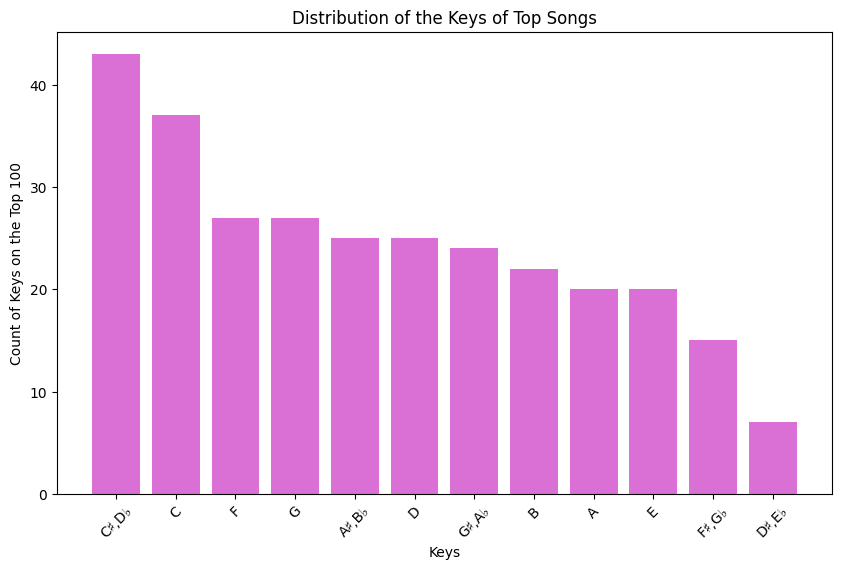

In [ ]:
songs_key2020=plot_key_distribution(df20)
songs_key2020

En este año también predomino la C♯,D♭ y se podría decir que también se usó mucho la C.

In [ ]:
popular_songs_key(df20, 'C♯,D♭')

Valores de Energy, Valence y Danceability de las canciones en tonalidad C♯,D♭
Canción: Blinding Lights
Artista: The Weeknd
Energy: 0.73
Valence: 0.334
Danceability: 0.514
--------------------
Canción: Bound 2
Artista: Kanye West
Energy: 0.665
Valence: 0.31
Danceability: 0.367
--------------------
Canción: Say It Right
Artista: Nelly Furtado
Energy: 0.872
Valence: 0.809
Danceability: 0.872
--------------------
Canción: Shoota (feat. Lil Uzi Vert)
Artista: Playboi Carti
Energy: 0.649
Valence: 0.47
Danceability: 0.673
--------------------
Canción: No Guidance (feat. Drake)
Artista: Chris Brown
Energy: 0.454
Valence: 0.136
Danceability: 0.696
--------------------
Canción: Lemonade (feat. Gunna, Don Toliver & NAV)
Artista: Internet Money
Energy: 0.658
Valence: 0.462
Danceability: 0.8
--------------------
Canción: Electric Feel
Artista: MGMT
Energy: 0.803
Valence: 0.561
Danceability: 0.763
--------------------
Canción: Lemonade
Artista: Internet Money
Energy: 0.66
Valence: 0.471
Danceability

El patrón se volvió a cumplir, aunque en este año la danceability fue muy alta, seguro fue un año repleto de trends, pero se aprecian casi los mismos valores que en los archivos anteriores.

In [ ]:
popular_songs_key(df20, 'C')

Valores de Energy, Valence y Danceability de las canciones en tonalidad C
Canción: Save Your Tears
Artista: The Weeknd
Energy: 0.826
Valence: 0.644
Danceability: 0.68
--------------------
Canción: cardigan
Artista: Taylor Swift
Energy: 0.581
Valence: 0.551
Danceability: 0.613
--------------------
Canción: Chanel
Artista: Frank Ocean
Energy: 0.503
Valence: 0.473
Danceability: 0.776
--------------------
Canción: American Boy
Artista: Estelle
Energy: 0.729
Valence: 0.512
Danceability: 0.727
--------------------
Canción: Go Crazy
Artista: Chris Brown
Energy: 0.578
Valence: 0.581
Danceability: 0.755
--------------------
Canción: Savage Love (Laxed - Siren Beat)
Artista: Jawsh 685
Energy: 0.481
Valence: 0.761
Danceability: 0.767
--------------------
Canción: Just Can’t Get Enough
Artista: Black Eyed Peas
Energy: 0.628
Valence: 0.262
Danceability: 0.659
--------------------
Canción: Physical
Artista: Dua Lipa
Energy: 0.844
Valence: 0.746
Danceability: 0.647
--------------------
Canción: Blueb

Se observa casi lo mismo que con la tonalidad C♯,D♭, pues el valor más alto es danceability y el más bajo es valence pero todos cumplen con el patrón que se ha seguido, pasar del 0.5 en promedio.

En esta pequeña parte del análisis podriamos concluir que, una canción para que sea popular debería ser muy bailable, ser más o menos alegre y que sea enérgica, quiza no al punto de una canción de rock pero si con algo de ritmo, además la tonalidad que más predomino fue la C♯,D♭.

Ahora nuestra pregunta es ¿qué es un modelo de predicción?

<a id="4"></a>
## Machine Learning

Se encarga de generar algoritmos que tienen la capacidad de aprender y no tener que programarlos de manera explícita, es decir, el desarrollador no tendrá que sentarse a programar por horas tomando en cuenta todos los escenarios posibles ni todas las excepciones posibles, que es justo lo que estaba haciendo al considerar las variables que tenemos en los dataset cargados.
<a id="4.1"></a>
### <u>Tipos de Aprendizaje</u>
    - Aprendizaje supervisado:
Es cuando entrenamos un algoritmo de Machine Learning dándole las preguntas (características) y las respuestas (etiquetas). Así en un futuro el algoritmo pueda hacer una predicción conociendo las características, se destacan los algoritmos de clasificación y el de regresión.
- Algoritmo de clasificación: 
El algoritmo encuentra patrones en los datos que le damos y los clasifica en grupos. Luego compara los nuevos datos y los ubica en uno de los grupos y es así como puede predecir de que se trata. 
- Algoritmo de regresión: 
En este método lo que se espera es un número. No lo ubica en un grupo, sino que devuelve un valor específico.

    - Aprendizaje no supervisado:
Solo le damos las características al algoritmo, nunca las etiquetas. El algoritmo solo sabe que como los datos comparten ciertas características, de esa forma asume que pueda que pertenezcan al mismo grupo.

<a id="4.2"></a>
### <u>Modelos de Machine Learning</u>
    - Modelos lineales
En estos se encuentran la famosa regresión lineal, la logística (adaptación de la lineal). Al ser modelos relativamente simples, no ofrecen resultados muy buenos para comportamientos más complicados.


    - Modelos de árbol
Destacan los árboles de decisión y los random forest (una media de árboles de decisión). Al ser más precisos y elaborados, obviamente ganamos en capacidad predictiva, pero perdemos en rendimiento.

    - Redes Neuronales
El reconocimiento de imágenes o vídeos, por ejemplo, es un mecanismo complejo y una red neuronal es lo mejor para realizarlo. El problema es que son lentas de entrenar y necesitan mucha capacidad de cómputo.

## Las variables más significativas
Por medio de los mapas de correlación se pudo apreciar que las variables más relacionadas con la popularidad de una canción fueron varias, el inconveniente fue que se detectaron estas variables en los dataframes por separado, entonces para los fines de predicción mezclare los tres dataframes en uno solo, separados aun así por año y ya con este nuevo dataframe haré de nuevo un mapa de correlación para ahora si, definir las variables con relaciones ya sean positivas o negativas.

In [7]:
# Primero asignare los años correspondientes para que se mantenga la información ordenada 
df22=df22.assign(year=2022)
df21=df21.assign(year=2021)
df20=df20.assign(year=2020)

In [8]:
# Dataframe que ya contendrá los dataframes del 2022, 2021 y 2020 
dfAll = pd.concat([df22, df21, df20], ignore_index=True)

In [9]:
dfAll.describe()

,artist_pop,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,year
count,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000
mean,67.120805,61.837584,0.717439,0.652750,-6.434842,0.557047,5.275168,0.124137,0.211385,0.020371,0.190034,0.535993,122.339293,3.957047,186859.185235,2020.961074
std,17.014902,22.961145,0.128110,0.155729,2.371747,0.497069,3.687853,0.123269,0.234037,0.100384,0.142755,0.216822,25.579655,0.308102,45919.355116,0.862815
min,0.000000,0.000000,0.174000,0.045800,-23.928000,0.000000,0.000000,0.025200,0.000038,0.000000,0.021900,0.034800,62.948000,1.000000,37632.000000,2020.000000
25%,57.000000,53.000000,0.650000,0.542000,-7.636000,0.000000,1.000000,0.043900,0.024800,0.000000,0.094400,0.383000,103.991000,4.000000,157712.000000,2020.000000
50%,69.000000,69.000000,0.725000,0.673000,-6.135000,1.000000,5.000000,0.069700,0.123000,0.000000,0.125000,0.531000,121.932000,4.000000,181733.000000,2021.000000
75%,81.000000,78.000000,0.802000,0.773000,-4.753000,1.000000,8.000000,0.164000,0.316000,0.000160,0.260000,0.711000,134.002000,4.000000,214137.000000,2022.000000
max,95.000000,97.000000,0.980000,0.989000,-1.609000,1.000000,11.000000,0.907000,0.974000,0.939000,0.944000,0.970000,210.857000,5.000000,467587.000000,2022.000000


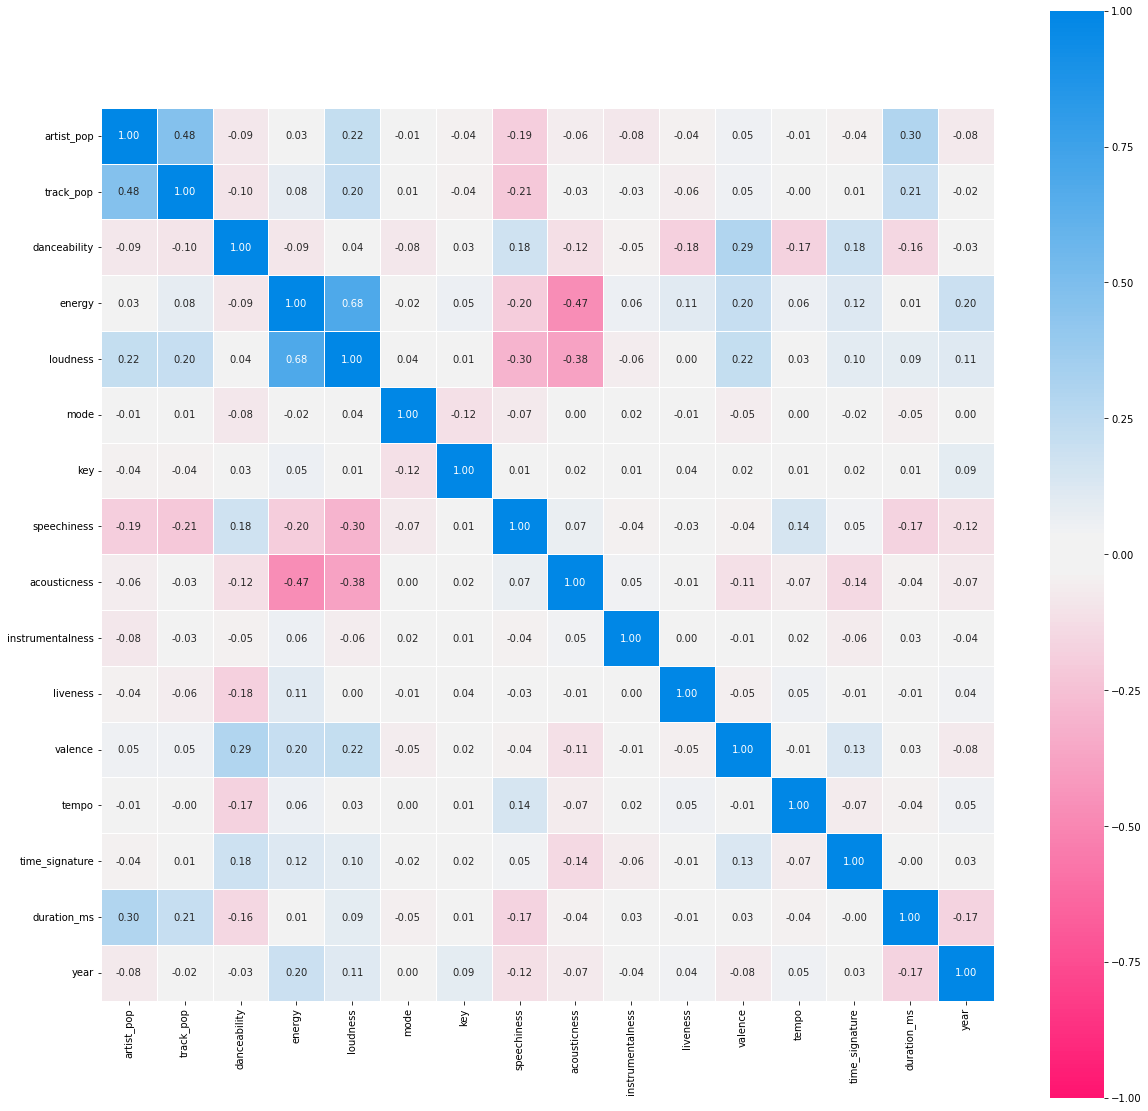

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
palette = sns.diverging_palette(0, 250, s=100, l=55, as_cmap=True, sep=10)
correlacion_mapa(dfAll, ax, palette)

Se pueden observar las relaciones entre:
- acousticness y energy (Negativa)
- loudness y energy (Positiva)
- artist_pop y track_pop (Positiva)
- acousticness y loudness (Negativa)
- valence y danceability (Positiva)

Incluso algo que pareciera no influir sobre la popularidad de las canciones como la duración de una canción, también se puede apreciar que si tiene alguna relación con variables que pueden ser interesantes como las siguientes:
- duration_ms y artist_pop (Positiva)
- duration_ms y track_pop (Positiva) 

Y de hecho es interesante porque ambas variables con las que tuvó relación duration_ms, las dos están directamente relacionadas con la popularidad, recordemos que artist_pop es la popularidad del artista y track_pop es la popularidad de la canción.

Por último, se puede ver la relación entre track_pop y artist_pop (Positiva) 

## Modelos predictivos utilizados
Vamos a hacer una prueba con alguna canción que ya se sepa que es popular de acuerdo con los datos que se tienen.

In [10]:
dfAll

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,year
0,Running Up That Hill (A Deal With God),Kate Bush,81,Hounds Of Love,95,0.629,0.547,-13.123,0,10,0.0550,0.7200,0.003140,0.0604,0.197,108.375,4,298933,2022
1,As It Was,Harry Styles,91,As It Was,96,0.520,0.731,-5.338,0,6,0.0557,0.3420,0.001010,0.3110,0.662,173.930,4,167303,2022
2,Sunroof,Nicky Youre,73,Sunroof,44,0.768,0.716,-5.110,1,10,0.0404,0.3500,0.000000,0.1500,0.841,131.430,4,163026,2022
3,Heat Waves,Glass Animals,80,Dreamland (+ Bonus Levels),89,0.761,0.525,-6.900,1,11,0.0944,0.4400,0.000007,0.0921,0.531,80.870,4,238805,2022
4,About Damn Time,Lizzo,81,About Damn Time,92,0.836,0.743,-6.305,0,10,0.0656,0.0995,0.000000,0.3350,0.722,108.966,4,191822,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,Buttons,The Pussycat Dolls,68,PCD,65,0.570,0.821,-4.380,1,2,0.2670,0.1780,0.000000,0.2890,0.408,210.857,4,225560,2020
741,Get Busy,Sean Paul,79,Dutty Rock,74,0.735,0.824,-4.143,0,10,0.0360,0.6150,0.000000,0.1580,0.726,100.202,4,211666,2020
742,ROCKSTAR (feat. Roddy Ricch),DaBaby,82,BLAME IT ON BABY,80,0.746,0.690,-7.956,1,11,0.1640,0.2470,0.000000,0.1010,0.497,89.977,4,181733,2020
743,Who Says,Selena Gomez & The Scene,67,When The Sun Goes Down,76,0.682,0.927,-2.915,1,4,0.0479,0.0843,0.000000,0.1490,0.744,101.019,4,195613,2020


In [11]:
from sklearn.model_selection import train_test_split

# "y" sera la fvariable a predecir
X = dfAll[['energy','artist_pop','valence','loudness','duration_ms','acousticness','key']]
y = dfAll['track_pop']

# Dividí los datos en entrenamiento (train) y en pruebas (test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Regresión Lineal

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()

# Entreno el modelo usando los datos separados anteriormente de entrenamiento 
model.fit(X_train, y_train)

# Realizo prediccion utilizando el conjunto de prueba 
y_pred = model.predict(X_test)

# Error cuadrático medio sirve para evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)

Error cuadrático medio (MSE): 295.78524958955137


¿En qué consiste la regresión lineal?

In [13]:
# cree un dtaframe con mis valores de prueba, 
# 1. Buttons de The Pussycat Dolls
# 2. Get Busy Sean Paul
# 3. As It Was de Harry Styles
X_prueba = pd.DataFrame({
    'energy': [0.821 , 0.824, 0.731],
    'artist_pop': [68, 79, 91],
    'valence': [0.408, 0.726, 0.662],
    'loudness': [-4.380, -4.143, -5.338],
    'duration_ms': [225560, 211666, 167303],
    'acousticness': [0.1780, 0.6150, 0.3420],
    'key': [2, 10, 6]
})

# aqui se realiza la prediccion con los valores que yo defini.
y_prueba = model.predict(X_prueba)

print("Predicción para los valores de prueba:")
print(y_prueba)

Predicción para los valores de prueba:
[66.24405356 73.93235545 76.92448999]


In [20]:
# Pruebas extras con:
# 1. Canción no tan reciente, de los 80's: Every Breath You Take
# 2. Canción que nunca haya sido famosa: Throw That Back Like a Cadillac

X_prueba = pd.DataFrame({
    'energy': [0.480, 0.627],
    'artist_pop': [68, 1],
    'valence': [0.720, 0.383],
    'loudness': [-9.000, -9.408],
    'duration_ms': [204000, 118075],
    'acousticness': [0.560,0.075800],
    'key': [1, 7]
})

# aqui se realiza la prediccion con los valores que yo defini.
y_prueba = model.predict(X_prueba)

print("Predicción para los valores de prueba:")
print(y_prueba)

Predicción para los valores de prueba:
[61.49684192 15.70917978]


In [ ]:
# https://tunebat.com/Info/Every-Breath-You-Take-The-Police/0SNGe4xksgp7CGnY5kMXOJ

### Árbol de Decisión

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Crear y ajustar el modelo de Árbol de Decisión
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el Error Cuadrático Medio
mse = mean_squared_error(y_test, y_pred)
print("Error Cuadrático Medio (MSE):", mse)


Error Cuadrático Medio (MSE): 493.06711409395973


Las predicciones son correctas aunque para el modelo de regresión lineal y con las variables que tome pareciera que el máximo es un 80 aproximadamente pues la canción con más popularidad fue la tercera y efectivamente, tuvo mayor puntaje, tendiendo a 80.

Este modelo funciona bastante bien, aun así añadire más datos para ver si puedo obtener mejores resultados con más datos e incluso otros modelos.

## Extensión de Datos
En esta ocasión usaré datos de Spotify y lo que planeo hacer en esta sección es hacer clasificación binaria, por lo que cuando llegue el momento de preparar mis datos, asignaré algunos valores de 1 y 0 a columnas como popularity, esta técnica me pareció buena para iniciar en este mundo predictivo ya que no soy muy experimentada, lo que haré es que sobre ciertas métricas asignaré esos valores de 1 o 0.

### Entonces, ¿qué es la clasificación binaria?

Es un tipo de clasificación en el que tan solo se pueden asignar dos clases diferentes (0 o 1). El ejemplo típico es la detección de email spam, en la que cada email es: spam → en cuyo caso será etiquetado con un 1 ; o no lo es → etiquetado con un 0. Esto tiene su fundamento en la distribución Bernoulli. (La distribución Bernoulli es una distribución de probabilidad discreta para eventos con resultados binarios. Predice la probabilidad de que un evento ocurra o no ocurra. La distribución Bernoulli utiliza 0 y 1. De ahí que la notación se extienda también al etiquetado de clases binarias.

El etiquetado de clases binarias suele utilizar algoritmos más sencillos y rápidos como: 

- Regresión Logística 
- Árboles de decisión
- Vecinos más cercanos (kNNs)
- Bates ingenuos
- Máquina de vectores de apoyo 

### Ingeniería de Caracteristícas
 Ya que vimos un poco de teoría sobre lo que es la clasificación binaria, ahora veamos cuales caracteristícas son las más destacables para llevar a cabo la predicción.

In [ ]:
dataframe = pd.read_csv('data/SpotifyFeatures.csv')
dataframe.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [ ]:
dataframe

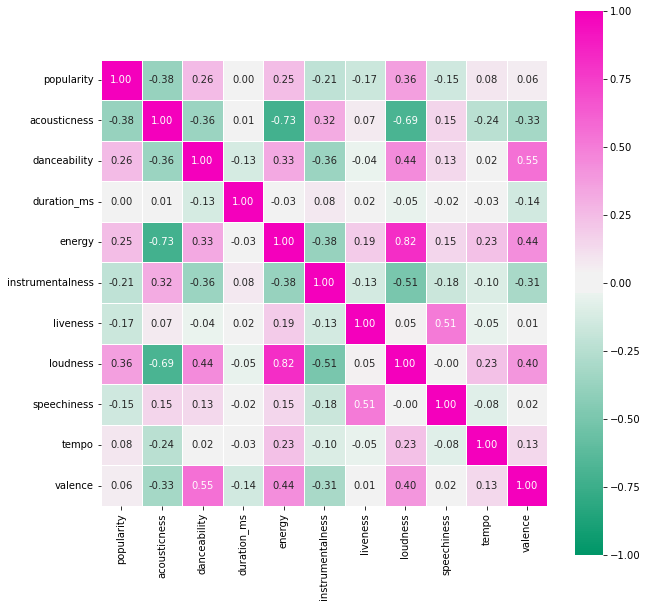

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
palette = sns.diverging_palette(150, 330, s=100, l=55, as_cmap=True, sep=10)
correlacion_mapa(dataframe, ax, palette)

A simple vista se puede ver que:

Correlación Negativa
- energy y acousticness (fuerte)
- loudness y acousticness (fuerte)
- instrumentalness y loudness (moderada)
- popularity y acousticness (débil)

Correlación Positiva
- loudness y energy (fuerte)
- danceability y valence (fuerte)
- valence y energy (moderada)
- valence y loudness (moderada)
- popularity y loudness (débil)
- danceability y loudness (moderada)



In [ ]:
# Veamos cual tonalidad es la más usada en este conjunto de datos
dataframe[["key","popularity"]].groupby(["key"], as_index = False).mean().sort_values(by="popularity",ascending = False)

,key,popularity
4,C#,43.697341
2,B,43.479758
9,F#,43.100972
11,G#,42.890956
7,E,40.724727
0,A,40.501566
1,A#,40.427283
3,C,40.387920
8,F,39.979782
5,D,39.971757


In [ ]:
# Análisis de valence (Recordemos que valence es el estado de humor de la canción, es feliz o triste)
animo=dataframe.copy()
animo["valence"]= [ "happy" if i>=0.5 else "unhappy" for i in dataframe.valence ]
animo["valence"].value_counts()


valence
unhappy    131581
happy      101144
Name: count, dtype: int64

In [ ]:
animopop=animo[animo["popularity"]>57]
animopop

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
135,R&B,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,65,0.08300,0.724,246333,0.689,0.000000,D,0.3040,-5.922,Minor,0.1350,146.496,4/4,happy
136,R&B,Rihanna,Desperado,6KFaHC9G178beAp7P0Vi5S,63,0.32300,0.685,186467,0.610,0.000000,C,0.1020,-5.221,Minor,0.0439,94.384,3/4,unhappy
137,R&B,Yung Bleu,Ice On My Baby (feat. Kevin Gates) - Remix,6muW8cSjJ3rusKJ0vH5olw,62,0.06750,0.762,199520,0.520,0.000004,F,0.1140,-5.237,Minor,0.0959,75.047,4/4,unhappy
138,R&B,Surfaces,Heaven Falls / Fall on Me,7yHqOZfsXYlicyoMt62yC6,61,0.36000,0.563,240597,0.366,0.002430,B,0.0955,-6.896,Minor,0.1210,85.352,4/4,happy
139,R&B,Olivia O'Brien,Love Myself,4XzgjxGKqULifVf7mnDIQK,68,0.59600,0.653,213947,0.621,0.000000,B,0.0811,-5.721,Minor,0.0409,100.006,4/4,unhappy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228968,Soul,Kevin Morby,Harlem River,0cDQyfkR7kYIBITKccaDmN,59,0.26100,0.607,555883,0.469,0.400000,C#,0.0953,-10.248,Minor,0.0297,118.669,4/4,unhappy
229916,Soul,Craig David,Walking Away,3R7fjB38qajI6JR69y5k4e,59,0.19600,0.596,204867,0.686,0.000000,A,0.1210,-6.371,Minor,0.0345,172.835,4/4,happy
230312,Soul,James Brown,Get Up (I Feel Like Being A) Sex Machine - Pts...,6hpmTwgNCz81H2bFEREx29,60,0.27300,0.833,318800,0.661,0.000149,A#,0.2940,-7.595,Minor,0.1010,108.314,4/4,happy
230817,Soul,Paloma Faith,Make Your Own Kind of Music,5jsFFhABp2FkasGr4QcQd6,60,0.00862,0.567,163840,0.753,0.001830,E,0.1270,-4.823,Major,0.0406,120.098,4/4,happy


In [ ]:
happy_count = animopop["valence"].value_counts()["happy"]
print("Total de canciones happy:", happy_count)

Total de canciones happy: 20754


In [ ]:
unhappy_count = animopop["valence"].value_counts()["unhappy"]
print("Total de canciones unhappy:", unhappy_count)

Total de canciones unhappy: 23889


### Entonces, ¿qué se puede decir?
- Las relaciones como valence-dancebility y energy-loudness son correlaciones muy fuertes, lo que significa que a la gente le gustan las canciones con un buen ritmo para poder bailar, además que sean ruidosas y enérgicas. 
- C# y B indican mayor popularidad.
- De manera inesperada valence nos indica que la gente prefiere canciones tristes, aunque las que tienen ritmos felices también son altamente seleccionadas pues no hay mucha diferencia entre ambas. 
- Las correlaciones entre acousticness y energy, loudness, fueron negativas fuertes, esto nos dice que entre mayor sea el valor de acousticness, menor será el valor de energy y loudness, por lo que se podría concluir que entre más acústica sea una canción menos probabilidad de que sea popular.

A continuación se vuelven a colocar las correlaciones encontradas: 

Correlación Negativa
- energy y acousticness (fuerte)
- loudness y acousticness (fuerte)
- instrumentalness y loudness (moderada)
- popularity y acousticness (débil)

Correlación Positiva
- loudness y energy (fuerte)
- danceability y valence (fuerte)
- valence y energy (moderada)
- valence y loudness (moderada)
- popularity y loudness (débil)
- danceability y loudness (moderada)

Este DataFrame por fortuna ya está limpio, no hace falta eliminar o rellenar valores nulos para poder trabajarlo, lo que si debería hacerse es cambiar mode, key a números para poder procesar la información.

In [ ]:
# cambio de string a numeros
list_of_keys = dataframe['key'].unique()
for i in range(len(list_of_keys)):
    dataframe.loc[dataframe['key'] == list_of_keys[i], 'key'] = i
dataframe.sample(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
177323,Jazz,Jimmy Durante,Try A Little Tenderness,3bAlUvYPcQNykdgKgtV2xS,40,0.66100,0.377,172880,0.2380,0.000744,0,0.596,-14.792,Major,0.0500,109.717,5/4,0.450
77248,Children’s Music,The Score,Unstoppable,6rrKbzJGGDlSZgLphopS49,70,0.00146,0.469,192107,0.8450,0.000032,0,0.148,-3.936,Minor,0.0499,77.990,4/4,0.564
199212,Soundtrack,Bear McCreary,Agents of S.H.I.E.L.D. Overture,7g5H7rvDNnb6VAaLxjCgW5,44,0.73000,0.462,171960,0.5050,0.731000,0,0.115,-12.833,Major,0.0716,96.120,4/4,0.177
105700,Opera,June Anderson,La Regata Veneziana,3jTJhAy9Dd3LVRhTGTWc1Q,8,0.98700,0.394,273000,0.0355,0.000006,2,0.109,-21.755,Major,0.0494,94.987,4/4,0.158
152448,R&B,Alessia Cara,River Of Tears,5NRl32BO29q8xtWFvOlHZE,67,0.92800,0.388,254507,0.3720,0.000000,1,0.146,-5.720,Major,0.0468,89.701,4/4,0.285


In [ ]:
# cambio de string a numeros
list_of_time_signatures = dataframe['time_signature'].unique()
for i in range(len(list_of_time_signatures)):
    dataframe.loc[dataframe['time_signature'] == list_of_time_signatures[i], 'time_signature'] = i
dataframe.sample(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
74221,Children's Music,Kimbo Children's Music,The Dreidel Song,3uGZyZCAq346bQbbT2xpRI,0,0.7330,0.733,91960,0.250,0.000000,8,0.0679,-10.601,Major,0.0333,80.978,0,0.833
126098,Classical,Hector Berlioz,"Roméo et Juliette, Op. 17, H 79, Pt. 1: No. 1e...",7DPtBiifQfcjUvyLLq4tUS,0,0.8750,0.418,168027,0.168,0.000000,10,0.0926,-25.117,Minor,0.1020,75.894,0,0.129
41612,Folk,Wrabel,Poetry,6F84CqAnWGg6CZiWFNDuQ9,62,0.0208,0.575,249813,0.478,0.000011,7,0.1440,-5.517,Major,0.0314,125.968,0,0.297
146785,Jazz,Thievery Corporation,True Sons of Zion,4KR0MPuDrJBXc7nDeQoEb7,50,0.0228,0.744,244720,0.590,0.005280,2,0.0558,-7.360,Major,0.0918,165.965,0,0.626
138775,Reggae,Indubious,He Who Has Ears,6YSxcuoMJZSy6f9MMcda9m,19,0.2000,0.893,242480,0.480,0.000000,2,0.0907,-8.826,Major,0.0431,111.898,0,0.582


También aplicaré unos parametros de popularidad, si la popularidad es mayor a 57 se asignará un 1 y si es menor un 0.

In [ ]:
dataframe.loc[dataframe['popularity'] < 57, 'popularity'] = 0 
dataframe.loc[dataframe['popularity'] >= 57, 'popularity'] = 1
dataframe.loc[dataframe['popularity'] == 1]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
135,R&B,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,1,0.08300,0.724,246333,0.689,0.000000,8,0.3040,-5.922,Minor,0.1350,146.496,0,0.6930
136,R&B,Rihanna,Desperado,6KFaHC9G178beAp7P0Vi5S,1,0.32300,0.685,186467,0.610,0.000000,2,0.1020,-5.221,Minor,0.0439,94.384,2,0.3230
137,R&B,Yung Bleu,Ice On My Baby (feat. Kevin Gates) - Remix,6muW8cSjJ3rusKJ0vH5olw,1,0.06750,0.762,199520,0.520,0.000004,3,0.1140,-5.237,Minor,0.0959,75.047,0,0.0862
138,R&B,Surfaces,Heaven Falls / Fall on Me,7yHqOZfsXYlicyoMt62yC6,1,0.36000,0.563,240597,0.366,0.002430,11,0.0955,-6.896,Minor,0.1210,85.352,0,0.7680
139,R&B,Olivia O'Brien,Love Myself,4XzgjxGKqULifVf7mnDIQK,1,0.59600,0.653,213947,0.621,0.000000,11,0.0811,-5.721,Minor,0.0409,100.006,0,0.4660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230312,Soul,James Brown,Get Up (I Feel Like Being A) Sex Machine - Pts...,6hpmTwgNCz81H2bFEREx29,1,0.27300,0.833,318800,0.661,0.000149,9,0.2940,-7.595,Minor,0.1010,108.314,0,0.8580
230782,Soul,Alex Hepburn,If You Stay,4sJoIeb8zWYCLHSLM0az3b,1,0.04530,0.719,194554,0.702,0.000013,11,0.0662,-4.577,Major,0.0357,116.938,0,0.6130
230817,Soul,Paloma Faith,Make Your Own Kind of Music,5jsFFhABp2FkasGr4QcQd6,1,0.00862,0.567,163840,0.753,0.001830,5,0.1270,-4.823,Major,0.0406,120.098,0,0.5660
230946,Soul,James Brown,Papa's Got A Brand New Bag - Pt. 1,5aZzmPUv5a2nna9sxBrmpL,1,0.51900,0.775,128973,0.725,0.054100,5,0.0944,-8.369,Major,0.0944,129.681,0,0.9140


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import train_test_split


In [ ]:
features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "valence"]

In [ ]:
training = dataframe.sample(frac = 0.8,random_state = 420)
X_train = training[features]
y_train = training['popularity']
X_test = dataframe.drop(training.index)[features]

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 420)

#### Regresión Logística

In [ ]:
LR_Model = LogisticRegression()
LR_Model.fit(X_train, y_train)
LR_Predict = LR_Model.predict(X_valid)
LR_Accuracy = accuracy_score(y_valid, LR_Predict)
print("Precisión: " + str(LR_Accuracy))

Precisión: 0.7895316360511333


#### Random Forest

In [ ]:
RFC_Model = RandomForestClassifier()
RFC_Model.fit(X_train, y_train)
RFC_Predict = RFC_Model.predict(X_valid)
RFC_Accuracy = accuracy_score(y_valid, RFC_Predict)
print("Precisión: " + str(RFC_Accuracy))

Precisión: 0.9192179611129014


Este modelo funcionó muy bien y algo que me pareció raro hasta el momento es que se tardo mucho en terminar en comparación con otros modelos, tardo 57.5 segundos en terminar la operación, es el tiempo record que ha tardado un modelo en ejecutarse pero fue por una buena razón y es que dió muy buena precisión. Esto lo podiamos esperar desde la sección en la que se describieron los modelos de Machine Learning, se mencionaba que los modelos Forest eran más precisos pero requerían mayor rendimiento.

#### K-Nearest Neighbors

In [ ]:
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(X_train, y_train)
KNN_Predict = KNN_Model.predict(X_valid)
KNN_Accuracy = accuracy_score(y_valid, KNN_Predict)
print("Precisión: " + str(KNN_Accuracy))

Precisión: 0.7684230314749168


In [ ]:
precisiones = pd.DataFrame({'Model': ['LogisticRegression', 'RandomForestClassifier', 'KNeighborsClassifier'],'Precisión': [LR_Accuracy,RFC_Accuracy,KNN_Accuracy]})

In [ ]:
precisiones.sort_values(by = "Precisión", ascending = False)

,Model,Precisión
1,RandomForestClassifier,0.919218
0,LogisticRegression,0.789532
2,KNeighborsClassifier,0.768423


In [ ]:
# cree un dtaframe con mis valores de prueba, 
# 1. Buttons de The Pussycat Dolls
# 2. Get Busy Sean Paul
# 3. As It Was de Harry Styles
example1 = pd.DataFrame({
    'acousticness': [0.1780, 0.6150, 0.3420],
    'danceability': [0.570, 0.735, 0.520],
    'duration_ms': [225560, 211666, 167303],
    'energy': [0.821 , 0.824, 0.731],
    'instrumentalness': [0.000000,0.000000, 0.001010],
    'key': [2, 10, 6],
    'valence': [0.408, 0.726, 0.662]
})  

# Realizar la predicción con el modelo entrenado
RFC_Predict = RFC_Model.predict(example1)

# Imprimir el resultado de la predicción
print("Predicción RFC:", RFC_Predict)


Predicción RFC: [0 1 0]


En el ejemplo planteado, muestra una clasificación de clase 0 en la cual indica que es una canción con baja popularidad, para Buttons de The Pussycat Dolls y As It Was de Harry Styles. Sin embargo, muestra una clase de 1 para Get Busy de Sean Paul

<a id="6"></a>
## Conclusión

El modelo ganador fue el regresión lineal al predecir bien la popularidad de las canciones que se ingresaron para ver si estaba prediciendo bien, aunque como ya fue mencionado, parece que no hay un 100%, si no un 80% pues a este número tendían las canciones con mayor popularidad.

En la segunda ronda de modelos predicitivos, el mejor modelo fue el de Random Forest Classifier y los otros dos, regresión logística y KNeighbors no se diferenciaron por mucho, ambos tuvieron casi la misma precisión. Sin embargo no predijó adecuadamente en las pruebas, quizá por las características ingresadas, habrá que delimitar mejor para estos modelos cuáles caracteristícas considerar.